In [100]:
from census import Census
#from config import (census_key, gkey)
import gmaps
import numpy as np
import pandas as pd
import requests
import time
from us import states
from scipy.stats import linregress
#from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

In [2]:
#Load the csv file from cdc website.
death_by_age = "CDC_Death_by_Age1.csv"
death_df = pd.read_csv(death_by_age, encoding="ISO-8859-1")
death_df

,ï»¿Data as of,Start week,End Week,State,Sex,Age group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
0,7/22/20,2/1/20,7/11/20,United States,All,Under 5 years,20.0,"1,547",52,2,41,100,NaN
1,7/22/20,2/1/20,7/11/20,United States,All,5-14 years,16.0,"2,379",78,5,49,138,NaN
2,7/22/20,2/1/20,7/11/20,United States,All,15-24 years,190.0,"14,810",300,62,51,475,NaN
3,7/22/20,2/1/20,7/11/20,United States,All,25-34 years,935.0,"30,885","1,113",416,149,"1,768",NaN
4,7/22/20,2/1/20,7/11/20,United States,All,35-44 years,2411.0,"43,783","2,433","1,009",242,"4,048",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1410,7/22/20,2/1/20,7/11/20,Puerto Rico,Female,75-84 years,0.0,0,0,0,0,0,NaN
1411,7/22/20,2/1/20,7/11/20,Puerto Rico,Female,85 years and over,0.0,0,0,0,0,0,NaN
1412,7/22/20,2/1/20,7/11/20,Puerto Rico,Female,All ages,NaN,434,44,NaN,NaN,52,One or more data cells have counts between 1â...
1413,7/22/20,2/1/20,7/11/20,Puerto Rico,Unknown,All ages,0.0,NaN,0,0,0,0,One or more data cells have counts between 1â...


In [3]:
#delete columns that are not needed.
del death_df['Total Deaths']
del death_df['Pneumonia Deaths']
del death_df['Pneumonia and COVID-19 Deaths']
del death_df['Influenza Deaths']
del death_df['Pneumonia, Influenza, or COVID-19 Deaths']
death_df

,ï»¿Data as of,Start week,End Week,State,Sex,Age group,COVID-19 Deaths,Footnote
0,7/22/20,2/1/20,7/11/20,United States,All,Under 5 years,20.0,NaN
1,7/22/20,2/1/20,7/11/20,United States,All,5-14 years,16.0,NaN
2,7/22/20,2/1/20,7/11/20,United States,All,15-24 years,190.0,NaN
3,7/22/20,2/1/20,7/11/20,United States,All,25-34 years,935.0,NaN
4,7/22/20,2/1/20,7/11/20,United States,All,35-44 years,2411.0,NaN
...,...,...,...,...,...,...,...,...
1410,7/22/20,2/1/20,7/11/20,Puerto Rico,Female,75-84 years,0.0,NaN
1411,7/22/20,2/1/20,7/11/20,Puerto Rico,Female,85 years and over,0.0,NaN
1412,7/22/20,2/1/20,7/11/20,Puerto Rico,Female,All ages,NaN,One or more data cells have counts between 1â...
1413,7/22/20,2/1/20,7/11/20,Puerto Rico,Unknown,All ages,0.0,One or more data cells have counts between 1â...


In [4]:
#Locate rows that are just for all states, both sexes by age group
death_all_df = death_df.loc[(death_df["State"]=="United States") & 
                            (death_df["Sex"]=="All") &
                            (death_df["Age group"]!="All Ages")] 
death_all_df.head(20)

,ï»¿Data as of,Start week,End Week,State,Sex,Age group,COVID-19 Deaths,Footnote
0,7/22/20,2/1/20,7/11/20,United States,All,Under 5 years,20.0,NaN
1,7/22/20,2/1/20,7/11/20,United States,All,5-14 years,16.0,NaN
2,7/22/20,2/1/20,7/11/20,United States,All,15-24 years,190.0,NaN
3,7/22/20,2/1/20,7/11/20,United States,All,25-34 years,935.0,NaN
4,7/22/20,2/1/20,7/11/20,United States,All,35-44 years,2411.0,NaN
5,7/22/20,2/1/20,7/11/20,United States,All,45-54 years,6566.0,NaN
6,7/22/20,2/1/20,7/11/20,United States,All,55-64 years,15880.0,NaN
7,7/22/20,2/1/20,7/11/20,United States,All,65-74 years,27167.0,NaN
8,7/22/20,2/1/20,7/11/20,United States,All,75-84 years,34399.0,NaN
9,7/22/20,2/1/20,7/11/20,United States,All,85 years and over,42666.0,NaN


In [5]:
#Clean up column names
death_all_us = death_all_df[["ï»¿Data as of", 
                            "State", "Age group","COVID-19 Deaths"]]
death_all_us = death_all_us.rename(columns={"ï»¿Data as of": "Data as of",})

death_all_us


,Data as of,State,Age group,COVID-19 Deaths
0,7/22/20,United States,Under 5 years,20.0
1,7/22/20,United States,5-14 years,16.0
2,7/22/20,United States,15-24 years,190.0
3,7/22/20,United States,25-34 years,935.0
4,7/22/20,United States,35-44 years,2411.0
5,7/22/20,United States,45-54 years,6566.0
6,7/22/20,United States,55-64 years,15880.0
7,7/22/20,United States,65-74 years,27167.0
8,7/22/20,United States,75-84 years,34399.0
9,7/22/20,United States,85 years and over,42666.0


In [7]:
#Load Census data from the U.S. Census
census_age = "Age Bins1.csv"
age_df = pd.read_csv(census_age, encoding="ISO-8859-1")
age_df.head(20)

,Age Bracket,Number of People,Percent of people
0,Under 5 years,19929,6.2
1,5 to 14 years,41055,12.7
2,15 to 24 years,42342,13.1
3,25 to 34 years,44855,13.9
4,35 to 44 years,40660,12.6
5,45 to 54 years,41537,12.9
6,55 to 64 years,41700,12.9
7,65 to 74 years,30366,9.4
8,75 to 84 years,14559,4.5
9,85 years and over,6154,1.9


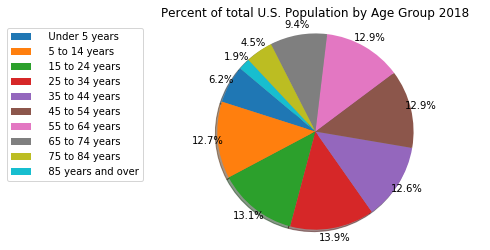

In [97]:
#Pie Chart of Total U.S. Population by age group from U.S. Census 2018
pct_age_pop = age_df["Percent of people"]
plt.pie(pct_age_pop, explode=None,  colors=None, autopct="%1.1f%%",shadow=True, startangle=140, rotatelabels=False, radius=1,pctdistance = 1.1, labeldistance = 1.8)
plt.axis("equal")
plt.title("Percent of total U.S. Population by Age Group 2018")
plt.legend(
    loc='best',
    labels=age_df["Age Bracket"],
    prop={'size': 10},
    bbox_to_anchor=(0.0, 1),)
plt.savefig("Images/Percent_Pop_US.png",bbox_inches='tight')
plt.show()

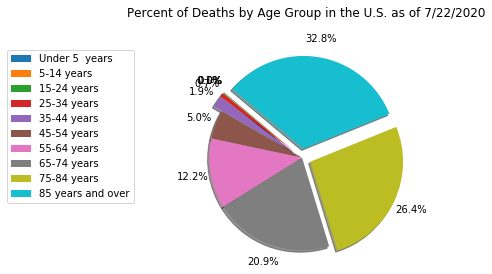

In [91]:
#Pie Chart of Covid deaths by age group from CDC as f 7/22/2020
covid_deaths = death_all_us["COVID-19 Deaths"]
plt.pie(covid_deaths, explode=(0.1,0.1,0.1,0.1,0.1,0,0,0,0.1,0.1,),  colors=None,
         autopct="%1.1f%%", shadow=True, startangle=140, rotatelabels=False, radius=1, pctdistance = 1.2, labeldistance = 1.1)
plt.axis("equal")
plt.title("Percent of Deaths by Age Group in the U.S. as of 7/22/2020",y = 1.1)
plt.legend(
    loc='best',
    labels=death_all_us["Age group"],
    prop={'size': 10},
    bbox_to_anchor=(0.0, 1),)

plt.savefig("Images/Percent_Death_US_Age_Group.png",bbox_inches='tight')
plt.show()        

In [10]:
print("Conclusion: People aged 75 years and older makes up 6.4% of the population but the percent of people who have died aged 75 years and older is over 59%. Therefore, Age is a factor in Coronavirus deaths.")

Conclusion: People aged 75 years and older makes up 6.4% of the population but the percent of people who have died aged 75 years and older is over 59%. Therefore, Age is a factor in Coronavirus deaths.


In [11]:
#Sort by highest rates of death by state from covid-19.
state_totals = death_df.loc[(death_df["State"]!="United States") & 
                            (death_df["Sex"]=="All")] 
state_totals_sort = state_totals.sort_values("COVID-19 Deaths",ascending=False)
state_totals_sort

,ï»¿Data as of,Start week,End Week,State,Sex,Age group,COVID-19 Deaths,Footnote
36,7/22/20,2/1/20,7/11/20,United States Total,All,All Ages,130250.0,NaN
920,7/22/20,2/1/20,7/11/20,New York City Total,All,All Ages,20460.0,NaN
842,7/22/20,2/1/20,7/11/20,New Jersey Total,All,All Ages,13811.0,NaN
894,7/22/20,2/1/20,7/11/20,New York Total,All,All Ages,11242.0,NaN
608,7/22/20,2/1/20,7/11/20,Massachusetts Total,All,All Ages,7753.0,NaN
1076,7/22/20,2/1/20,7/11/20,Pennsylvania Total,All,All Ages,7227.0,NaN
166,7/22/20,2/1/20,7/11/20,California Total,All,All Ages,7100.0,NaN
400,7/22/20,2/1/20,7/11/20,Illinois Total,All,All Ages,6652.0,NaN
634,7/22/20,2/1/20,7/11/20,Michigan Total,All,All Ages,5596.0,NaN
296,7/22/20,2/1/20,7/11/20,Florida Total,All,All Ages,4341.0,NaN


In [12]:
print("The highest five states with Covid-19 deaths are New York, New Jersy and Massachusetts Pennsylvania and California")
#print("The lowest three states with Covid-19 deaths are Hawaii, Wyoming Total, and Alaska")

The highest five states with Covid-19 deaths are New York, New Jersy and Massachusetts Pennsylvania and California


In [62]:
#Import clean CSV file for top 5 state deaths
top_states_death = "CDC_Death_by_Age_Hi_Low_States.csv"
top_states_death_df = pd.read_csv(top_states_death, encoding="ISO-8859-1")
top_states_death_df.head()

,ï»¿Data as of,Start week,End Week,State,Sex,Age group,COVID-19 Deaths
0,7/22/20,2/1/20,7/11/20,New York,Male,Under 5 years,0
1,7/22/20,2/1/20,7/11/20,New York,Male,5-14 years,0
2,7/22/20,2/1/20,7/11/20,New York,Male,15-24 years,43
3,7/22/20,2/1/20,7/11/20,New York,Male,25-34 years,227
4,7/22/20,2/1/20,7/11/20,New York,Male,35-44 years,680


In [63]:
#Clean up columns
del top_states_death_df['Sex']
top_states_death_df = top_states_death_df.rename(columns={"ï»¿Data as of": "Data as of",})
top_states_death_df.head()

,Data as of,Start week,End Week,State,Age group,COVID-19 Deaths
0,7/22/20,2/1/20,7/11/20,New York,Under 5 years,0
1,7/22/20,2/1/20,7/11/20,New York,5-14 years,0
2,7/22/20,2/1/20,7/11/20,New York,15-24 years,43
3,7/22/20,2/1/20,7/11/20,New York,25-34 years,227
4,7/22/20,2/1/20,7/11/20,New York,35-44 years,680


In [68]:
#Create variables for each state
ny_deaths = top_states_death_df.loc[(top_states_death_df["State"]=="New York")]
nj_deaths = top_states_death_df.loc[(top_states_death_df["State"]=="New Jersey")]
ma_deaths = top_states_death_df.loc[(top_states_death_df["State"]=="Massachusetts")]
pa_deaths = top_states_death_df.loc[(top_states_death_df["State"]=="Pennsylvania")]
ca_deaths = top_states_death_df.loc[(top_states_death_df["State"]=="California")]


,Data as of,Start week,End Week,State,Age group,COVID-19 Deaths
0,7/22/20,2/1/20,7/11/20,New York,Under 5 years,0
1,7/22/20,2/1/20,7/11/20,New York,5-14 years,0
2,7/22/20,2/1/20,7/11/20,New York,15-24 years,43
3,7/22/20,2/1/20,7/11/20,New York,25-34 years,227
4,7/22/20,2/1/20,7/11/20,New York,35-44 years,680
5,7/22/20,2/1/20,7/11/20,New York,45-54 years,1862
6,7/22/20,2/1/20,7/11/20,New York,55-64 years,4572
7,7/22/20,2/1/20,7/11/20,New York,65-74 years,7231
8,7/22/20,2/1/20,7/11/20,New York,75-84 years,8223
9,7/22/20,2/1/20,7/11/20,New York,85 years and over,8850


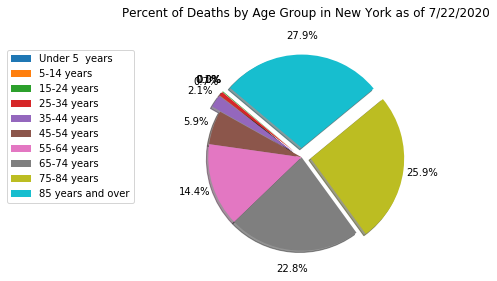

In [92]:
# Pie Chart of percent of deaths in New York by age group
ny_covid_deaths = ny_deaths["COVID-19 Deaths"]
plt.pie(ny_covid_deaths, explode=(0.1,0.1,0.1,0.1,0.1,0,0,0,0.1,0.1,),  colors=None,
         autopct="%1.1f%%", shadow=True, startangle=140, rotatelabels=False, radius=1, pctdistance = 1.2, labeldistance = 1.1)
plt.axis("equal")
plt.title("Percent of Deaths by Age Group in New York as of 7/22/2020",y = 1.1)
plt.legend(
    loc='best',
    labels=death_all_us["Age group"],
    prop={'size': 10},
    bbox_to_anchor=(0.0, 1),)
plt.savefig("Images/Percent_Death_NY_Age_Group.png",bbox_inches='tight')
plt.show()        

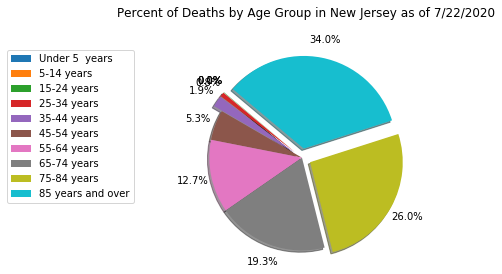

In [96]:
# Pie Chart of percent of deaths in New Jersey by age group
nj_covid_deaths = nj_deaths["COVID-19 Deaths"]
plt.pie(nj_covid_deaths, explode=(0.1,0.1,0.1,0.1,0.1,0,0,0,0.1,0.1,),  colors=None,
         autopct="%1.1f%%", shadow=True, startangle=140, rotatelabels=False, radius=1, pctdistance = 1.2, labeldistance = 1.1)
plt.axis("equal")
plt.title("Percent of Deaths by Age Group in New Jersey as of 7/22/2020",y = 1.1)
plt.legend(
    loc='best',
    labels=death_all_us["Age group"],
    prop={'size': 10},
    bbox_to_anchor=(0.0, 1),)
plt.savefig("Images/Percent_Death_NJ_Age_Group.png",bbox_inches='tight')
plt.show()        

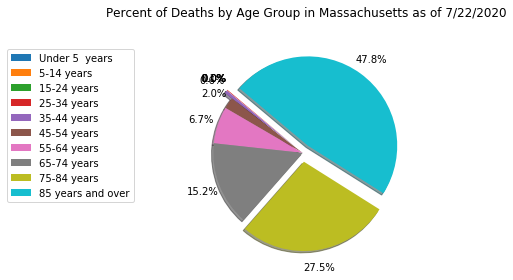

In [93]:
# Pie Chart of percent of deaths in Massachusetts by age group
ma_covid_deaths = ma_deaths["COVID-19 Deaths"]
plt.pie(ma_covid_deaths, explode=(0.1,0.1,0.1,0.1,0.1,0,0,0,0.1,0.1,),  colors=None,
         autopct="%1.1f%%", shadow=True, startangle=140, rotatelabels=False, radius=1, pctdistance = 1.2, labeldistance = 1.1)
plt.axis("equal")
plt.title("Percent of Deaths by Age Group in Massachusetts as of 7/22/2020",y = 1.1)
plt.legend(
    loc='best',
    labels=death_all_us["Age group"],
    prop={'size': 10},
    bbox_to_anchor=(0.0, 1),)
plt.savefig("Images/Percent_Death_MA_Age_Group.png",bbox_inches='tight')
plt.show()      

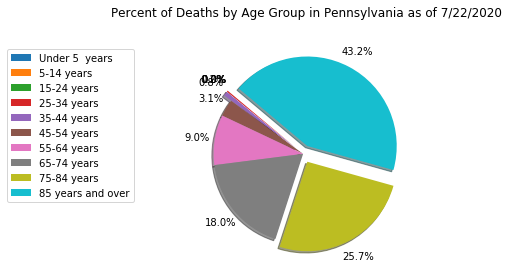

In [95]:
# Pie Chart of percent of deaths in Pennsylvania by age group
pa_covid_deaths = pa_deaths["COVID-19 Deaths"]
plt.pie(pa_covid_deaths, explode=(0.1,0.1,0.1,0.1,0.1,0,0,0,0.1,0.1,),  colors=None,
         autopct="%1.1f%%", shadow=True, startangle=140, rotatelabels=False, radius=1, pctdistance = 1.2, labeldistance = 1.1)
plt.axis("equal")
plt.title("Percent of Deaths by Age Group in Pennsylvania as of 7/22/2020",y = 1.1)
plt.legend(
    loc='best',
    labels=death_all_us["Age group"],
    prop={'size': 10},
    bbox_to_anchor=(0.0, 1),)
plt.savefig("Images/Percent_Death_PA_Age_Group.png",bbox_inches='tight')
plt.show()        

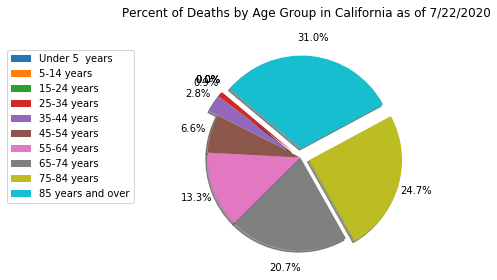

In [94]:
# Pie Chart of percent of deaths in California by age group
ca_covid_deaths = ca_deaths["COVID-19 Deaths"]
plt.pie(ca_covid_deaths, explode=(0.1,0.1,0.1,0.1,0.1,0,0,0,0.1,0.1,),  colors=None,
         autopct="%1.1f%%", shadow=True, startangle=140, rotatelabels=False, radius=1, pctdistance = 1.2, labeldistance = 1.1)
plt.axis("equal")
plt.title("Percent of Deaths by Age Group in California as of 7/22/2020",y = 1.1)
plt.legend(
    loc='best',
    labels=death_all_us["Age group"],
    prop={'size': 10},
    bbox_to_anchor=(0.0, 1),)
plt.savefig("Images/Percent_Death_CA_Age_Group.png",bbox_inches='tight')
plt.show()        